In [24]:
import pandas as pd
import numpy as np
data = pd.read_csv('Position_Salaries.csv')
X = data.iloc[:,1:2].values
y = data.iloc[:,2:3].values

In [25]:
#Ajustando escala
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
y_sc = StandardScaler()
X = X_sc.fit_transform(X)
y = y_sc.fit_transform(y)

In [26]:
#aplicando algoritmo
from sklearn.svm import SVR
vector = SVR()
vector.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
x_trans = X_sc.transform([[6.5]])
y_pred = vector.predict(x_trans)
y_pred = y_sc.inverse_transform(y_pred)

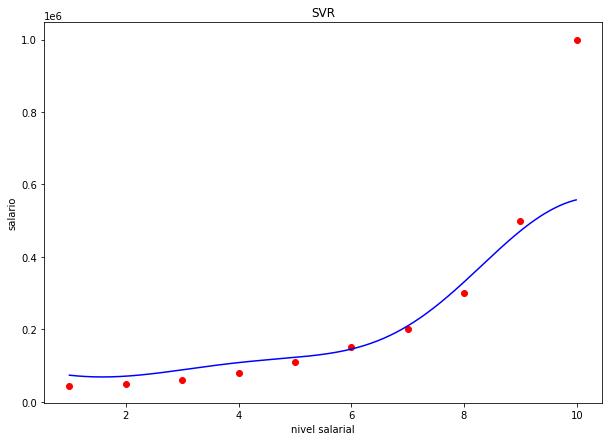

In [28]:
#graficando
import matplotlib.pyplot as plt
x_real = X_sc.inverse_transform(X)
y_real = y_sc.inverse_transform(y)
x_grid = np.arange(min(x_real), max(x_real), 0.01)
x_grid = x_grid.reshape(len(x_grid), 1)
x_grid_trans = X_sc.transform(x_grid)
y_grid = vector.predict(x_grid_trans)
y_grid_real = y_sc.inverse_transform(y_grid)
plt.figure(figsize = (10,7))
plt.scatter(x_real,y_real,color='red')
plt.plot(x_grid, y_grid_real, color='blue')
plt.title('SVR')
plt.xlabel('nivel salarial')
plt.ylabel('salario')
plt.show()